In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
import seaborn as sns
%matplotlib inline
p = sns.color_palette()
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

#https://github.com/mwaskom/seaborn/issues/1009

# 训练集：

In [24]:
训练放款时间表 = pd.read_csv("train/loan_time_train.txt",header=None,names=['用户标识','放款时间'])
训练放款时间表['放款时间']=训练放款时间表['放款时间']//86400

In [25]:
训练用户表 = pd.read_csv("train/user_info_train.txt",header=None,
                    names=['用户标识','用户性别','用户职业','用户教育程度',
                           '用户婚姻状态', '用户户口类型'])

In [26]:
训练信用卡账单表=pd.read_csv("train/bill_detail_train.txt",header=None,
                    names=['用户标识','时间','银行标识','上期账单金额','上期还款金额','信用卡额度',
                           '本期账单余额','本期账单最低还款额','消费笔数','本期账单金额','调整金额',
                          '循环利息','可用余额','预借现金额度','还款状态'])

In [27]:
训练信用卡账单表['时间']=训练信用卡账单表['时间']//86400

In [28]:
训练信用卡账单表 = pd.merge(训练信用卡账单表, 训练放款时间表,how='inner', on = "用户标识")

In [170]:
#训练信用卡账单表[(训练信用卡账单表['时间']>训练信用卡账单表['放款时间'])].groupby(["用户标识","时间","银行标识"],as_index=False)
训练表[(训练表['用户标识']==24)]

,用户标识,标签,用户性别,用户职业,用户教育程度,用户婚姻状态,用户户口类型,放款时间
23,24,0,1,2,3,3,3,68458


In [103]:
#放款前账单信息=d[(d['时间']<=d['放款时间_x'])].groupby(["用户标识","时间","银行标识"],as_index=False)
#放款后账单信息=d[(d['时间']>d['放款时间_x'])].groupby(["用户标识","时间","银行标识"],as_index=False)
#放款前上期账单金额=放款前账单信息['上期账单金额'].agg({'该用户该银行上月账单金额总计' : 'sum','该用户该银行上期账单数' : 'count'})
#放款前上期还款金额=放款前账单信息['上期还款金额'].agg({'该用户该银行上月还款金额总计' : 'sum','该用户该银行还款账单数' : 'count'})
#放款前上期还款金额

In [243]:
#训练信用卡账单表[(训练信用卡账单表['时间']>=训练信用卡账单表['放款时间'])]#385071 
#训练信用卡账单表[(训练信用卡账单表['时间']<训练信用卡账单表['放款时间'])]#1953047  
#d=pd.merge(训练信用卡账单表, 训练表,how='left', on = "用户标识")
#x=d[(d['信用卡额度']<d['本期账单余额'])]

In [57]:
用户浏览行为 = pd.read_csv("train/browse_history_train.txt",header=None,
                    names=['用户标识','浏览时间','浏览行为数据','浏览子行为编号'])
用户浏览行为['浏览时间']=用户浏览行为['浏览时间']//86400

In [11]:
银行流水记录=pd.read_csv("train/bank_detail_train.txt").rename(index=str,
                                                         columns={"uid": "用户标识","timespan": "流水时间",
                                                                  "type":"交易类型","amount":"交易金额","markup":"工资收入标记"})    
银行流水记录['流水时间']=银行流水记录['流水时间']//86400

In [2]:
训练表 = pd.read_csv("train/overdue_train.txt",header=None,
                    names=['用户标识','标签'])

In [59]:
训练表 = pd.merge(训练表,训练用户表,how='inner',on = "用户标识")
训练表 = pd.merge(训练表,训练放款时间表,how='inner',on = "用户标识")

# 测试集：

In [20]:
测试放款时间表 = pd.read_csv("test/loan_time_test.txt",header=None,names=['用户标识','放款时间'])

In [21]:
测试放款时间表['放款时间']=测试放款时间表['放款时间']//86400

In [22]:
测试用户表 = pd.read_csv("test/user_info_test.txt",header=None,
                    names=['用户标识','用户性别','用户职业','用户教育程度',
                           '用户婚姻状态', '用户户口类型'])

In [23]:
测试信用卡账单表=pd.read_csv("test/bill_detail_test.txt",header=None,
                    names=['用户标识','时间','银行标识','上期账单金额','上期还款金额','信用卡额度',
                           '本期账单余额','本期账单最低还款额','消费笔数','本期账单金额','调整金额',
                          '循环利息','可用余额','预借现金额度','还款状态'])
测试信用卡账单表['时间']=测试信用卡账单表['时间']//86400

In [24]:
测试信用卡账单表 = pd.merge(测试信用卡账单表, 测试放款时间表,how='inner', on = '用户标识')

In [ ]:
测试用户浏览行为 = pd.read_csv("test/browse_history_test.txt",header=None,
                    names=['用户标识','浏览时间','浏览行为数据','浏览子行为编号'])
测试用户浏览行为['浏览时间']测试用户浏览行为['浏览时间']//86400

In [ ]:
测试银行流水记录=pd.read_csv("test/bank_detail_test.txt").rename(index=str,
                                                         columns={"uid": "用户标识","timespan": "流水时间",
                                                                  "type":"交易类型","amount":"交易金额","markup":"工资收入标记"})    
测试银行流水记录['流水时间']=测试银行流水记录['流水时间']//86400

In [3]:
测试表 = pd.read_csv("test/usersID_test.txt",header=None,
                    names=['用户标识','标签'])

In [26]:
测试表 = pd.merge(测试表,测试用户表,how='inner',on = "用户标识")
测试表 = pd.merge(测试表,测试放款时间表,how='inner',on = "用户标识")

# EDA:

**用户基本属性分析:user_info.txt**

In [123]:
性别分布=训练表.groupby('用户性别',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
性别分布['性别逾期比']=性别分布['逾期']/性别分布['总数']
性别分布

,用户性别,逾期,总数,性别逾期比
0,0,654,1669,0.391851
1,1,5638,44254,0.127401
2,2,891,9673,0.092112


In [124]:
职业分布=训练表.groupby('用户职业',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
职业分布['职业逾期比']=职业分布['逾期']/职业分布['总数']
职业分布

,用户职业,逾期,总数,职业逾期比
0,0,75,368,0.203804
1,1,17,93,0.182796
2,2,5204,41150,0.126464
3,3,746,5898,0.126484
4,4,1141,8087,0.141091


In [125]:
用户婚姻状态=训练表.groupby('用户婚姻状态',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
用户婚姻状态['婚姻逾期比']=用户婚姻状态['逾期']/用户婚姻状态['总数']
用户婚姻状态

,用户婚姻状态,逾期,总数,婚姻逾期比
0,0,75,370,0.202703
1,1,3169,25098,0.126265
2,2,805,6038,0.133322
3,3,2909,22554,0.128979
4,4,210,1471,0.142760
5,5,15,65,0.230769


In [126]:
教育程度分布=训练表.groupby('用户教育程度',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
教育程度分布['教育程度逾期比']=教育程度分布['逾期']/教育程度分布['总数']
教育程度分布

,用户教育程度,逾期,总数,教育程度逾期比
0,0,75,369,0.203252
1,1,18,226,0.079646
2,2,813,8483,0.095839
3,3,2977,23530,0.126519
4,4,3300,22988,0.143553


In [127]:
用户户口类型=训练表.groupby('用户户口类型',as_index=False)['标签'].agg({'逾期' : 'sum','总数' : 'count'})
用户户口类型['户口类型逾期比']=用户户口类型['逾期']/用户户口类型['总数']
用户户口类型

,用户户口类型,逾期,总数,户口类型逾期比
0,0,75,369,0.203252
1,1,2033,17105,0.118854
2,2,2145,15557,0.137880
3,3,978,8216,0.119036
4,4,1952,14349,0.136037


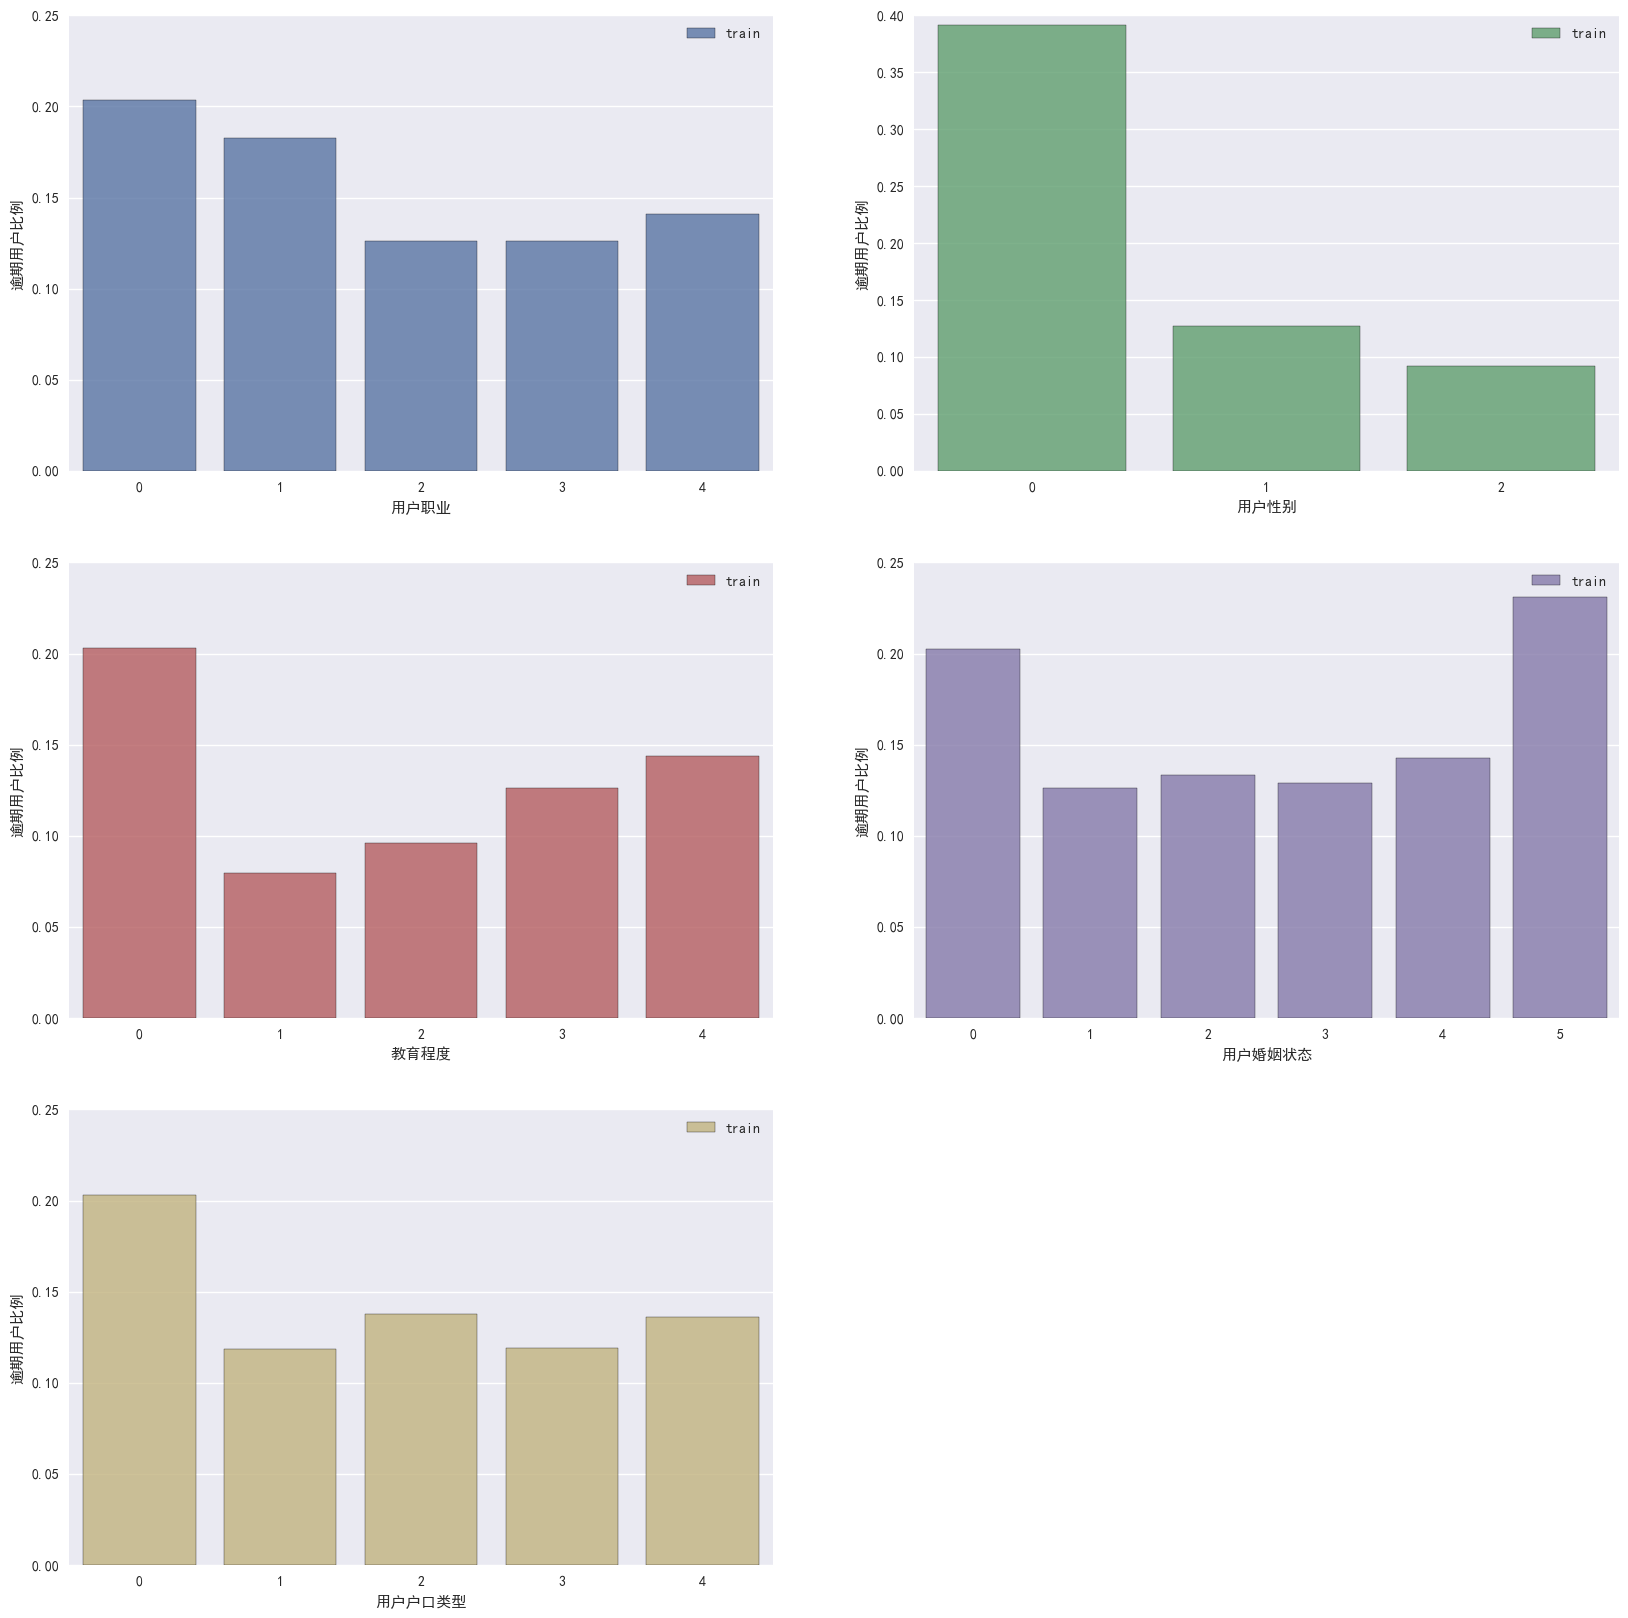

In [128]:
fig = plt.figure(figsize=(20, 20))


ax1 = fig.add_subplot(3, 2, 1)
ax1=sns.barplot(职业分布.index, 职业分布.逾期/职业分布.总数, alpha=0.8, color=p[0], label='train')
ax1.legend()
#ax1.set_title(u'职业分布情况') 
ax1.set_xlabel(u'用户职业')
ax1.set_ylabel(u'逾期用户比例')

ax2 = fig.add_subplot(3, 2, 2)
ax2=sns.barplot(性别分布.index, 性别分布.逾期/性别分布.总数, alpha=0.8, color=p[1], label='train')
ax2.legend()
#ax2.set_title(u'性别分布情况') 
ax2.set_xlabel(u'用户性别')
ax2.set_ylabel(u'逾期用户比例')

ax3 = fig.add_subplot(3, 2, 3)
ax3=sns.barplot(教育程度分布.index, 教育程度分布.逾期/教育程度分布.总数, alpha=0.8, color=p[2], label='train')
ax3.legend()
#ax3.set_title(u'教育程度分布') 
ax3.set_xlabel(u'教育程度')
ax3.set_ylabel(u'逾期用户比例')

ax4 = fig.add_subplot(3, 2, 4)
ax4=sns.barplot(用户婚姻状态.index, 用户婚姻状态.逾期/用户婚姻状态.总数, alpha=0.8, color=p[3], label='train')
ax4.legend()
#ax4.set_title(u'用户婚姻状态') 
ax4.set_xlabel(u'用户婚姻状态')
ax4.set_ylabel(u'逾期用户比例')

ax5 = fig.add_subplot(3, 2, 5)
ax5=sns.barplot(用户户口类型.index, 用户户口类型.逾期/用户户口类型.总数, alpha=0.8, color=p[4], label='train')
ax5.legend()
#ax5.set_title(u'用户户口类型') 
ax5.set_xlabel(u'用户户口类型')
ax5.set_ylabel(u'逾期用户比例')

plt.show() 

**信用卡账单表分析:bill_detail.txt**

每个用户账单时间>放款时间的账单数
    

In [101]:
t1=训练信用卡账单表[(训练信用卡账单表['时间']>训练信用卡账单表['放款时间'])].groupby("用户标识",as_index=False)
t2=训练信用卡账单表[(训练信用卡账单表['时间']>训练信用卡账单表['放款时间']+1)].groupby("用户标识",as_index=False)
t3=训练信用卡账单表[(训练信用卡账单表['时间']>训练信用卡账单表['放款时间']+2)].groupby("用户标识",as_index=False)

In [102]:
x=t1['时间'].apply(lambda x:np.unique(x).size)
x1=t1['时间'].agg({'t1' : 'count'})
x1['x1']=x

x=t2['时间'].apply(lambda x:np.unique(x).size)
x2=t2['时间'].agg({'t2' : 'count'})
x2['x2']=x

x=t3['时间'].apply(lambda x:np.unique(x).size)
x3=t3['时间'].agg({'t3' : 'count'})
x3['x3']=x

In [103]:
训练表=pd.merge(训练表,x1,how='left',on = "用户标识")
训练表=pd.merge(训练表,x2,how='left',on = "用户标识")
训练表=pd.merge(训练表,x3,how='left',on = "用户标识")
训练表=训练表.fillna(0)

In [280]:
d=训练表
l0_x1=d[(d['标签']==0)].groupby("x1",as_index=False)
l1_x1=d[(d['标签']==1)].groupby("x1",as_index=False)

l0_x1=l0_x1['x1'].agg({'l0_x1' : 'count'})#标签为0
l1_x1=l1_x1['x1'].agg({'l1_x1' : 'count'})#标签为1


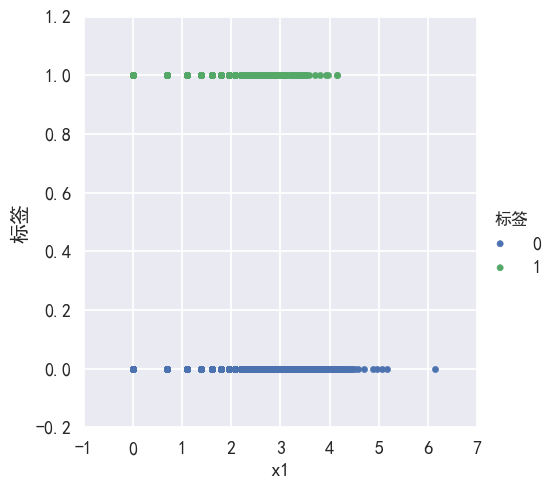

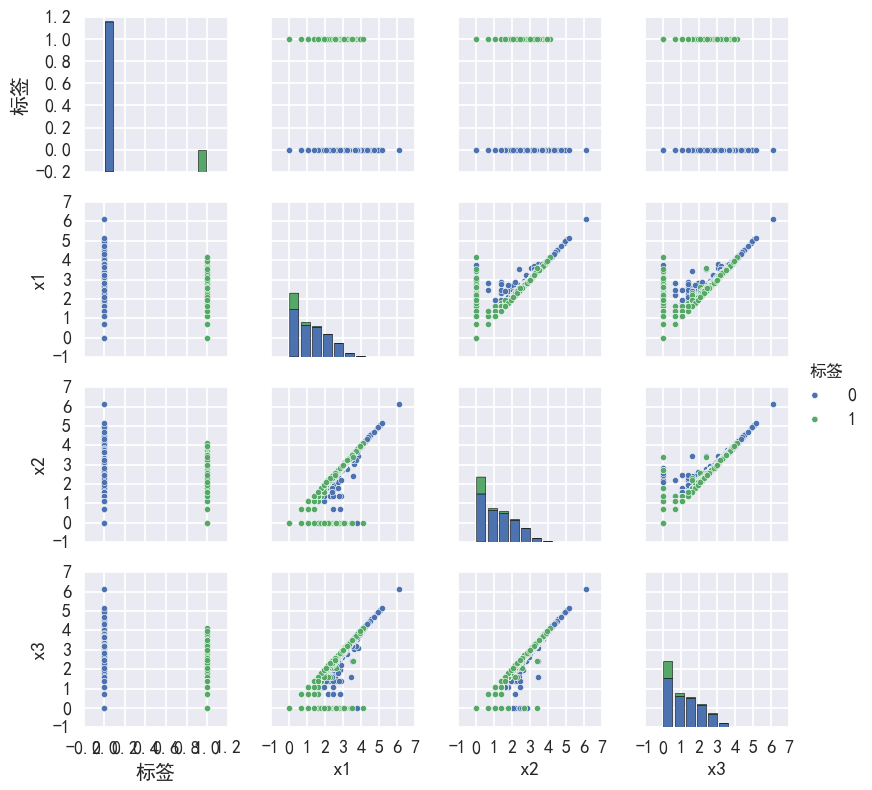

In [286]:
#l1_x1.plot(kind="scatter", x="x1", y="l1_x1")
#l0_x1.plot(kind="scatter", x="x1", y="l0_x1")
#d.plot(kind="scatter", x="x1", y="标签")
#sns.jointplot(x="x1", y="标签", data=d, size=5)

sns.FacetGrid(d, hue="标签", size=5).map(plt.scatter, "x1", "标签").add_legend()
xxx=d[['标签','x1','x2','x3']]
sns.pairplot(xxx, hue="标签", size=2)

In [287]:
#d['x1']=np.log(d['x1'] +1)
#d['x2']=np.log(d['x2'] +1)
#d['x3']=np.log(d['x3'] +1)
#d['output']=-0.4*(d['x1']+d['x2']+d['x2'])
#d

**银行流水记录分析:bank_detail.txt**

统计用户总(或者每月...)支出与收入的差值

In [107]:
训练银行流水记录表 = pd.merge(银行流水记录,训练放款时间表,how='left',on = "用户标识")

In [74]:
#训练银行流水记录表=训练银行流水记录表[(训练银行流水记录表['流水时间']>训练银行流水记录表['放款时间'])]

In [108]:
用户支出=训练银行流水记录表[(训练银行流水记录表['交易类型']==1)].groupby("用户标识",as_index=False)
用户收入=训练银行流水记录表[(训练银行流水记录表['交易类型']==0)].groupby("用户标识",as_index=False)
用户工资收入=训练银行流水记录表[(训练银行流水记录表['工资收入标记']==1)].groupby("用户标识",as_index=False)

In [109]:
用户支出=用户支出['交易金额'].agg({'用户支出' : 'sum'})
用户收入=用户收入['交易金额'].agg({'用户收入' : 'sum'})
用户工资收入=用户工资收入['交易金额'].agg({'用户工资收入' : 'sum'})

In [160]:
统计表 = 训练表

In [161]:
统计表=pd.merge(统计表,用户支出,how='left',on = "用户标识")
统计表=pd.merge(统计表,用户收入,how='left',on = "用户标识")
统计表=pd.merge(统计表,用户工资收入,how='left',on = "用户标识")

In [162]:
统计表=统计表.fillna(0)
统计表['入不敷出指数']=统计表['用户支出']-统计表['用户收入']

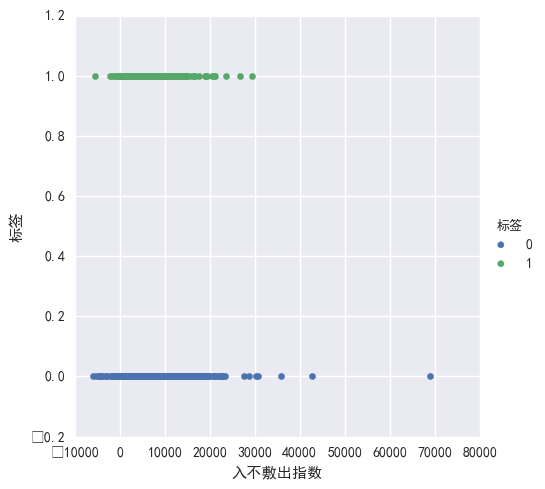

In [163]:
sns.FacetGrid(统计表, hue="标签", size=5).map(plt.scatter, "入不敷出指数", "标签").add_legend()

# **特征集可视化:**

In [ ]:
trains = pd.read_csv("feature/train_20170111.csv",encoding="gb2312") # 注意自己数据路径
tests = pd.read_csv("feature/test_20170111.csv",encoding="gb2312") # 注意自己数据路径

In [ ]:
sns.FacetGrid(trains, hue="标签", size=5).map(plt.scatter, "用户标识", "标签").add_legend()

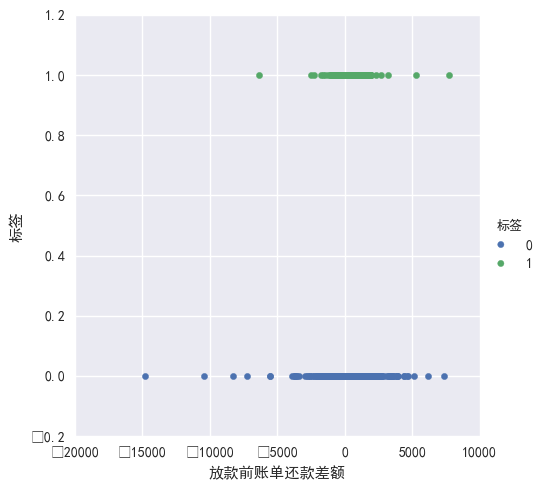

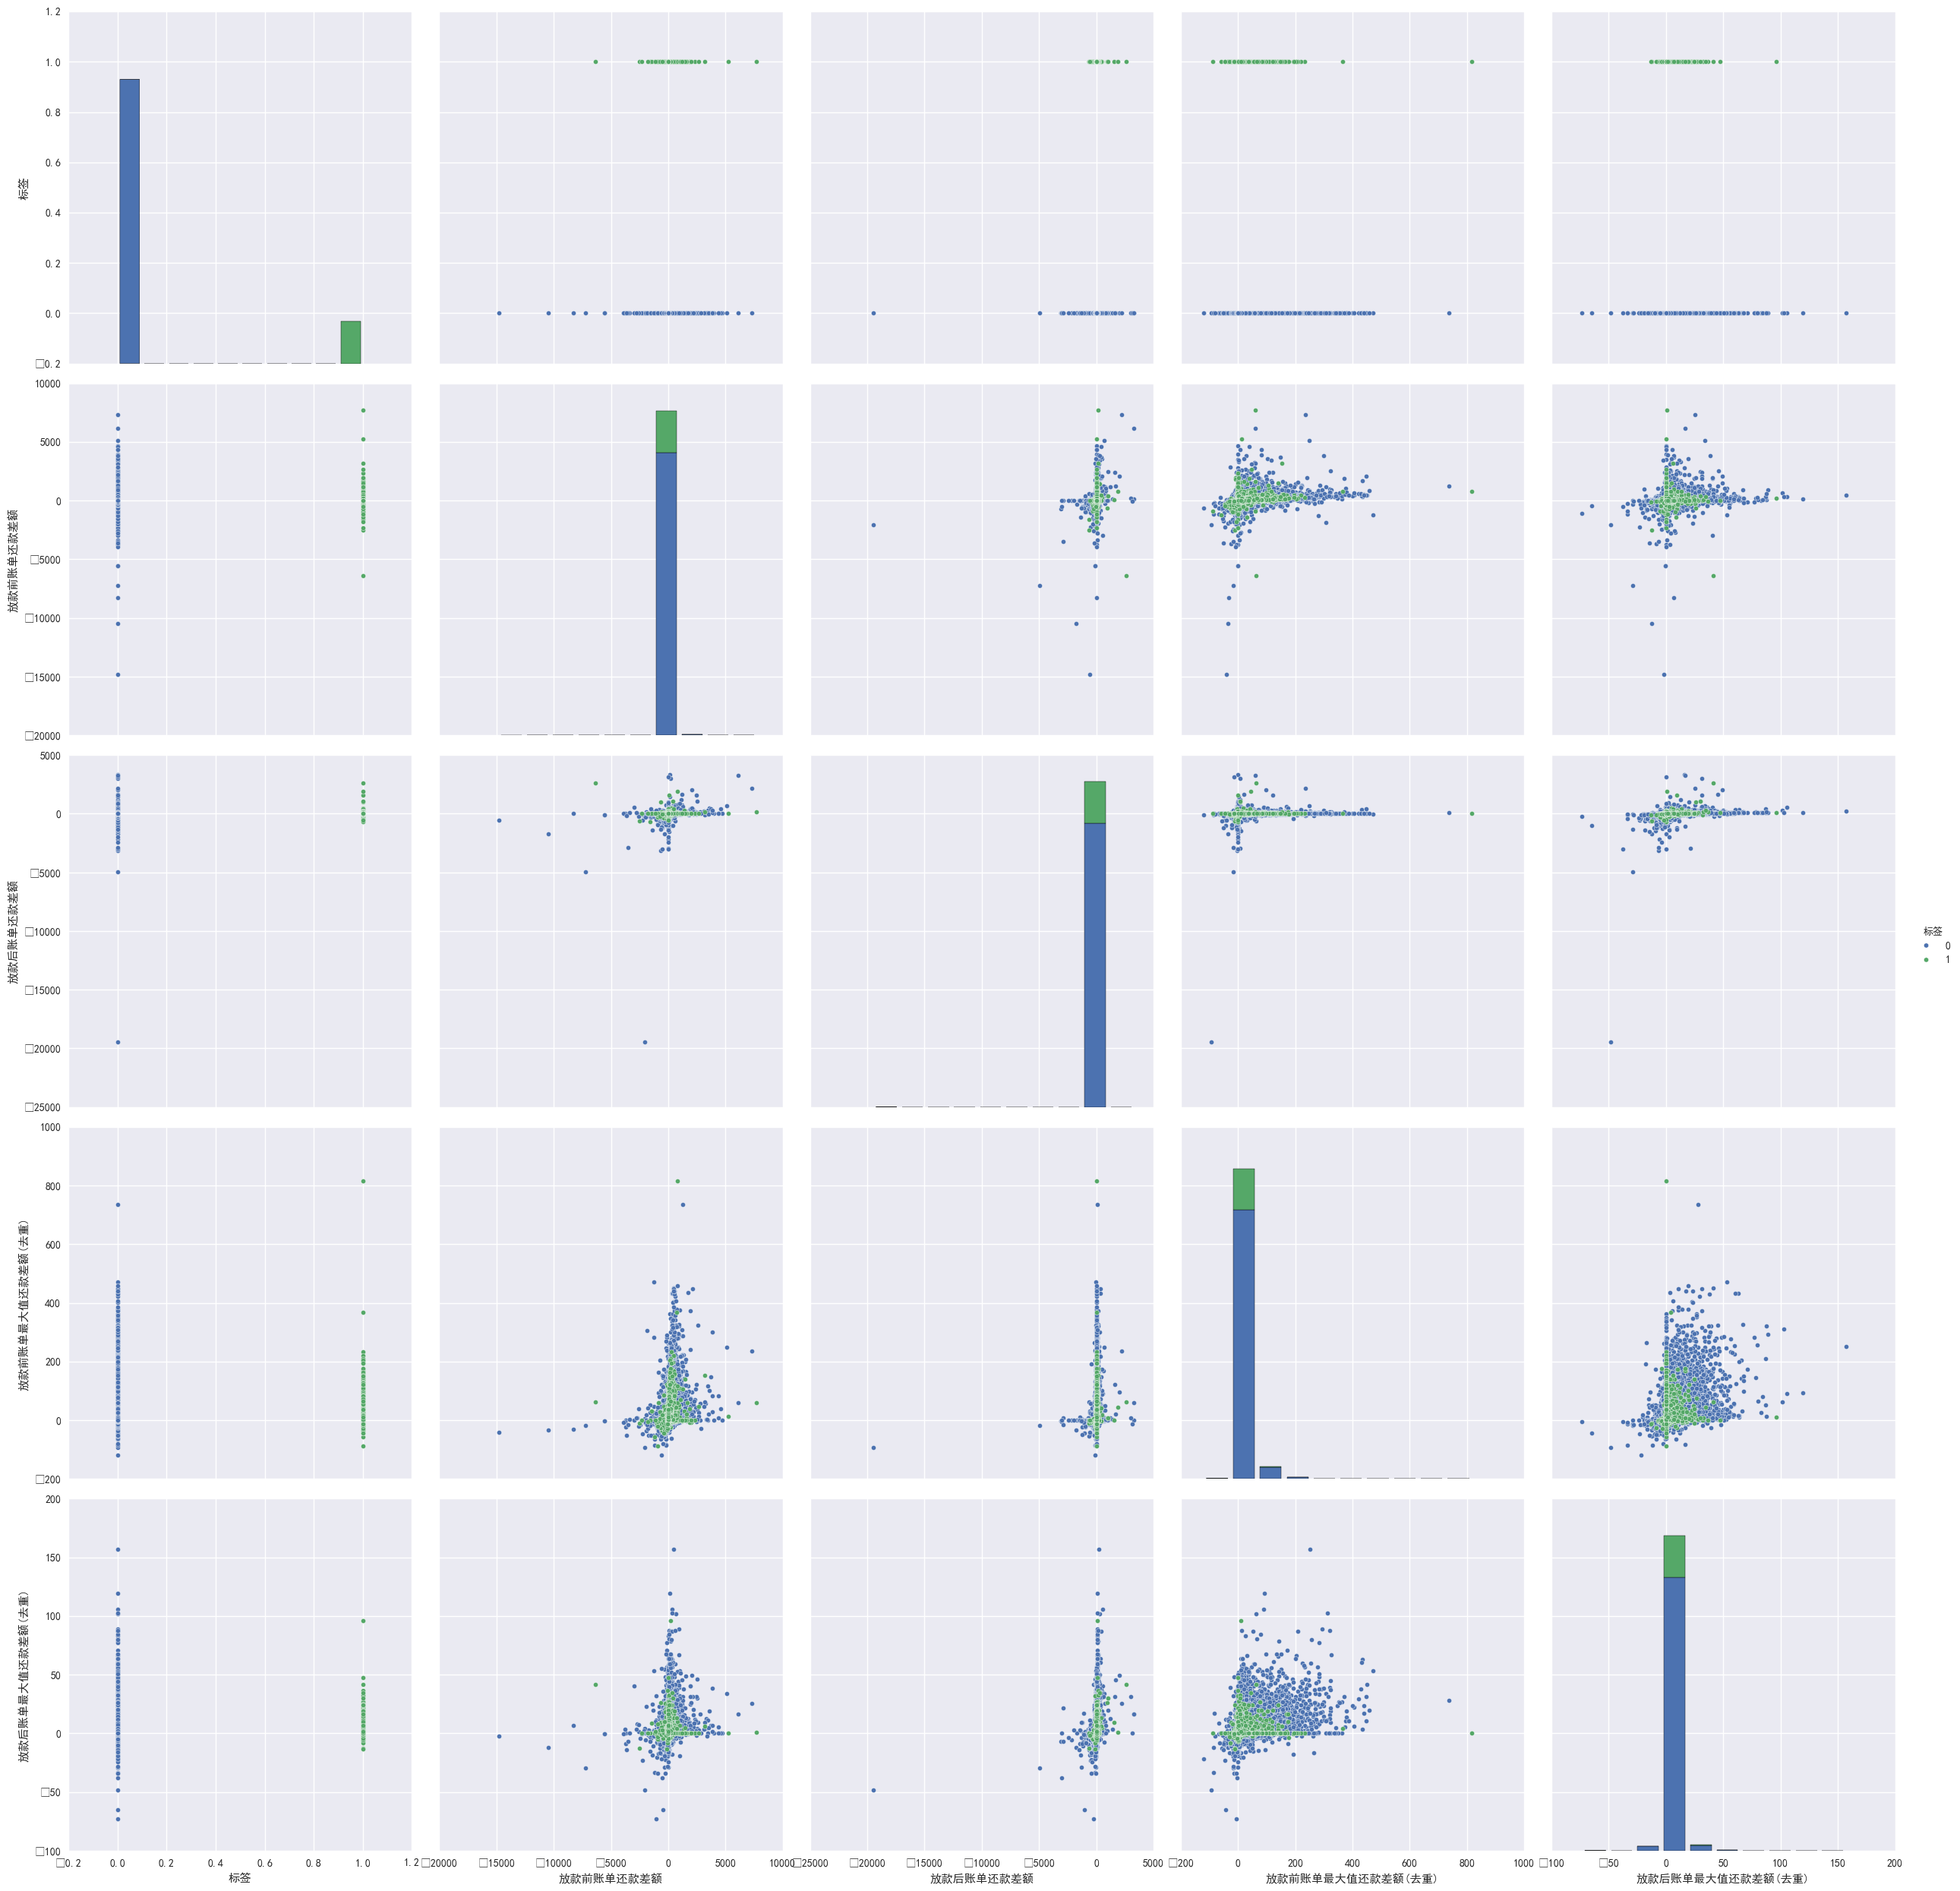

In [9]:
sns.FacetGrid(trains, hue="标签", size=5).map(plt.scatter, "放款前账单还款差额", "标签").add_legend()
xxx=trains[['标签','放款前账单还款差额','放款后账单还款差额','放款前账单最大值还款差额(去重)','放款后账单最大值还款差额(去重)']]
sns.pairplot(xxx, hue="标签", size=5)

In [5]:
trains

,用户标识,标签,用户性别,用户职业,用户教育程度,用户婚姻状态,用户户口类型,放款时间,放款前账单金额统计,放款前账单金额为负数,...,放款后账单小于还款计数(去重),放款后账单汇总还款差额(去重),放款后账单最大值还款差额(去重),爆卡次数,爆卡次数(去重),老段子特征1,老段子特征2,老段子特征3,用户银行卡账单计数,用户持卡数
0,1,0,1,2,3,1,3,68458,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,1,2,3,2,1,68458,154.150417,0.0,...,7.0,7.993085,7.993085,3.0,3.0,13.0,13.0,13.0,23.0,3.0
2,3,0,1,4,4,1,4,68458,36.733542,0.0,...,0.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,2.0,1.0
3,4,1,1,4,4,3,2,68458,144.813292,0.0,...,0.0,4.950437,4.950437,14.0,14.0,16.0,16.0,16.0,36.0,3.0
4,5,0,1,2,2,3,1,68458,41.358453,0.0,...,0.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,2.0,1.0
5,6,1,1,2,4,1,3,68458,803.645436,1.0,...,0.0,0.000000,0.000000,4.0,1.0,0.0,0.0,0.0,42.0,3.0
6,7,0,1,2,3,3,1,68458,703.275617,22.0,...,17.0,-8.053186,-8.045136,0.0,0.0,21.0,21.0,21.0,111.0,6.0
7,8,0,1,2,4,1,2,68458,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,4.0,4.0,4.0,4.0,1.0
8,9,0,2,2,3,1,3,68458,321.104320,2.0,...,0.0,0.000000,0.000000,5.0,4.0,0.0,0.0,0.0,22.0,3.0
9,10,0,1,3,4,3,2,68458,1937.591928,9.0,...,10.0,16.102374,10.503771,9.0,5.0,52.0,52.0,52.0,200.0,4.0


合并各类特征:

In [164]:
统计表=pd.merge(统计表, 性别分布,how='inner', on = '用户性别')
统计表=pd.merge(统计表, 职业分布,how='inner', on = '用户职业')
统计表=pd.merge(统计表, 用户婚姻状态,how='inner', on = '用户婚姻状态')
统计表=pd.merge(统计表, 教育程度分布,how='inner', on = '用户教育程度')
统计表=pd.merge(统计表, 用户户口类型,how='inner', on = '用户户口类型')

In [165]:
预测表=统计表
预测表['bank预测']=预测表['入不敷出指数']
预测表['bank预测']=预测表['bank预测']-min(预测表['bank预测'])
预测表['bank预测']=预测表['bank预测']/max(预测表['bank预测'])

In [166]:
预测表['bill预测']=-(预测表['x1']+1)*(预测表['x2']+1)*(预测表['x3']+1)
预测表['bill预测']=预测表['bill预测']-min(预测表['bill预测'])
预测表['bill预测']=预测表['bill预测']/max(预测表['bill预测'])

In [167]:
预测表['user预测']=0.1*预测表['职业逾期比']+0.3*预测表['婚姻逾期比']+0.1*预测表['教育程度逾期比']+0.1*预测表['户口类型逾期比']+0.4*预测表['性别逾期比']

In [178]:
预测表['预测']=预测表['bill预测']+0.1*预测表['bank预测']+0.3*预测表['user预测']

In [179]:
print(ks(预测表['bill预测'],预测表['标签']))
print(ks(预测表['bank预测'],预测表['标签']))
print(ks(预测表['user预测'],预测表['标签']))
print(ks(预测表['预测'],预测表['标签']))

('ks', 0.4336075368547409)
('ks', 0.040758799139195695)
('ks', 0.11243931818155217)
('ks', 0.13448272073186107)


In [1]:
#统计表[(统计表['入不敷出指数']<0)]

# 预测：

In [78]:
预测表 = 测试表

In [79]:
demo = pd.read_csv("output/demo.csv").rename(index=str, columns={"userid": "用户标识"})

In [80]:
预测表=pd.merge(预测表, demo,how='inner', on = '用户标识')

In [81]:
预测表=pd.merge(预测表, 性别分布,how='inner', on = '用户性别')

In [82]:
预测表=pd.merge(预测表, 职业分布,how='inner', on = '用户职业')

In [83]:
预测表=pd.merge(预测表, 用户婚姻状态,how='inner', on = '用户婚姻状态')

In [84]:
预测表=pd.merge(预测表, 教育程度分布,how='inner', on = '用户教育程度')

In [85]:
预测表=pd.merge(预测表, 用户户口类型,how='inner', on = '用户户口类型')

In [98]:
预测表['预测']=0.1*预测表['职业逾期比']+0.3*预测表['婚姻逾期比']+0.1*预测表['教育程度逾期比']+0.1*预测表['户口类型逾期比']+0.4*预测表['性别逾期比']

In [265]:
预测表['预测']=0.4*预测表['probability']+0.6*(0.1*预测表['职业逾期比']+0.2*预测表['婚姻逾期比']+0.1*预测表['教育程度逾期比']+
                                      0.1*预测表['户口类型逾期比']+0.5*预测表['性别逾期比'])

In [266]:
output=预测表[['用户标识','预测']].rename(index=str, columns={"用户标识": "userid", "预测": "probability"})

In [267]:
output.to_csv("output/20170108_A.csv",index=None,encoding='utf-8')

# KS評測:

In [31]:
from sklearn import metrics
def ks(y_predicted, y_true):
    label=y_true
    #label = y_true.get_label()
    fpr,tpr,thres = metrics.roc_curve(label,y_predicted,pos_label=1)
    return 'ks',abs(fpr - tpr).max()

In [42]:
y_p1=(1,2,3,4,9,10,11,12,5,6,7,8)
y_t1=(0,0,0,0,0,0,0,0,1,1,1,1)

y_p2=(1,2,3,5,8,10,11,12,4,6,7,9)
y_t2=(0,0,0,0,0,0,0,0,1,1,1,1)

y_p3=(1,2,4,5,8,9,11,12,3,6,7,10)
y_t3=(0,0,0,0,0,0,0,0,1,1,1,1)

y_p4=(1,2,4,6,7,9,11,12,3,5,8,10)
y_t4=(0,0,0,0,0,0,0,0,1,1,1,1)

In [43]:
print(ks(y_p1,y_t1))
print(ks(y_p2,y_t2))
print(ks(y_p3,y_t3))
print(ks(y_p4,y_t4))

('ks', 0.5)
('ks', 0.375)
('ks', 0.25)
('ks', 0.25)


In [100]:
print(ks(预测表['预测'],预测表['标签']))

('ks', 0.018437329474582986)


# 线下测试:

In [122]:
print(ks(预测表['预测'],预测表['标签']))

('ks', 0.4336075368547409)
